In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [6]:
file_path="/kaggle/input/datasets/amalelsayeh20/kidra-df"

In [8]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/datasets/amalelsayeh20/kidra-df/egypt_tourism_dataset.csv


In [10]:
df=pd.read_csv("/kaggle/input/datasets/amalelsayeh20/kidra-df/egypt_tourism_dataset.csv")

In [11]:
df.head()

,tourist_id,age,gender,nationality,city_visited,trip_duration_days,season,travel_company,total_spending_usd
0,T00001,15,Female,Germany,Cairo,9,Spring,Galaxy Travel Egypt,1658.99
1,T00002,16,Male,Canada,Hurghada,8,Autumn,King Tut Tours,2309.34
2,T00003,11,Female,Germany,Luxor,3,Spring,Classic Tours Egypt,594.10
3,T00004,5,Female,Norway,Aswan,10,Summer,Falcon Travel Egypt,2985.73
4,T00005,11,Male,UK,Cairo,6,Summer,Nile Travel Egypt,894.90


In [13]:
df.columns

Index(['tourist_id', 'age', 'gender', 'nationality', 'city_visited',
       'trip_duration_days', 'season', 'travel_company', 'total_spending_usd'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourist_id          10000 non-null  object 
 1   age                 10000 non-null  int64  
 2   gender              10000 non-null  object 
 3   nationality         10000 non-null  object 
 4   city_visited        10000 non-null  object 
 5   trip_duration_days  10000 non-null  int64  
 6   season              10000 non-null  object 
 7   travel_company      10000 non-null  object 
 8   total_spending_usd  10000 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [15]:
df.isnull().sum()

tourist_id            0
age                   0
gender                0
nationality           0
city_visited          0
trip_duration_days    0
season                0
travel_company        0
total_spending_usd    0
dtype: int64

In [16]:
df.describe()

,age,trip_duration_days,total_spending_usd
count,10000.000000,10000.000000,10000.000000
mean,12.027300,5.977300,1135.664283
std,4.050481,2.593387,643.343373
min,5.000000,2.000000,160.190000
25%,9.000000,4.000000,623.530000
50%,13.000000,6.000000,1017.315000
75%,16.000000,8.000000,1513.077500
max,18.000000,10.000000,3499.980000


In [18]:
df['age'].value_counts()

age
18    863
13    863
16    858
14    846
17    832
15    767
5     660
11    652
9     645
12    632
6     622
10    599
8     589
7     572
Name: count, dtype: int64

In [20]:
KidRa_df['age'].value_counts(normalize=True) * 100


age
18    8.63
13    8.63
16    8.58
14    8.46
17    8.32
15    7.67
5     6.60
11    6.52
9     6.45
12    6.32
6     6.22
10    5.99
8     5.89
7     5.72
Name: proportion, dtype: float64

In [25]:
df.columns

Index(['tourist_id', 'age', 'gender', 'nationality', 'city_visited',
       'trip_duration_days', 'season', 'travel_company', 'total_spending_usd'],
      dtype='object')

In [26]:
KidRa_df.groupby('age')['total_spending_usd'].mean()


age
5     1102.428424
6     1180.924614
7     1122.724283
8     1159.239151
9     1118.682791
10    1130.030451
11    1158.252055
12    1145.251266
13    1162.238308
14    1087.645201
15    1149.953468
16    1129.204103
17    1115.794135
18    1146.842851
Name: total_spending_usd, dtype: float64

# the most important chart

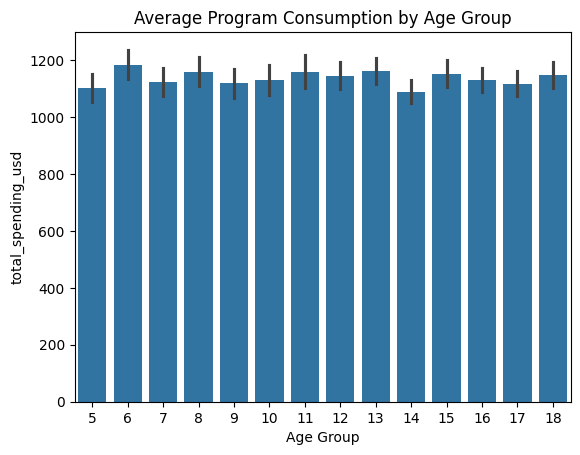

In [28]:
sns.barplot(
    data=df,
    x='age',
    y='total_spending_usd'
)
plt.title("Average Program Consumption by Age Group")
plt.xlabel("Age Group")
plt.ylabel("total_spending_usd")
plt.show()

In [30]:
Kid_df=df[df["age"] < 18]
Kid_df["total_spending_usd"].describe()


count    9137.000000
mean     1134.608455
std       643.295874
min       160.190000
25%       622.900000
50%      1016.240000
75%      1513.160000
max      3499.980000
Name: total_spending_usd, dtype: float64

In [34]:
Kid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9137 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourist_id          9137 non-null   object 
 1   age                 9137 non-null   int64  
 2   gender              9137 non-null   object 
 3   nationality         9137 non-null   object 
 4   city_visited        9137 non-null   object 
 5   trip_duration_days  9137 non-null   int64  
 6   season              9137 non-null   object 
 7   travel_company      9137 non-null   object 
 8   total_spending_usd  9137 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 713.8+ KB


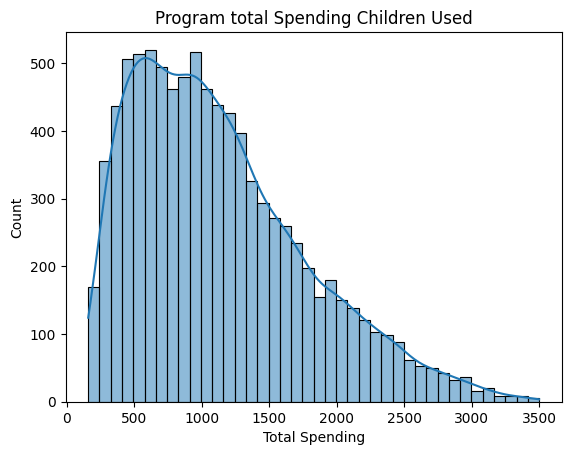

In [33]:
sns.histplot(Kid_df["total_spending_usd"], kde=True)
plt.title("Program total Spending Children Used")
plt.xlabel("Total Spending")
plt.show()

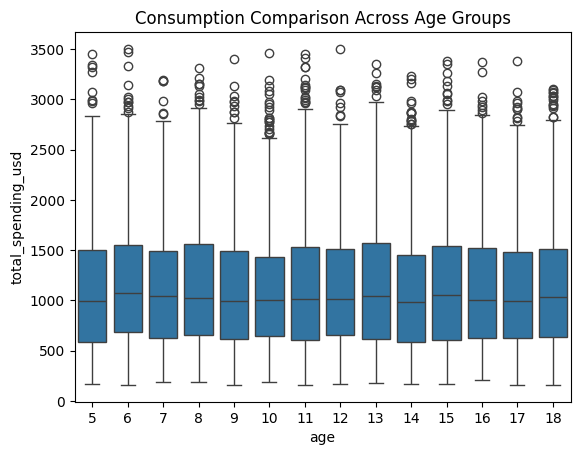

In [35]:
sns.boxplot(
    data=KidRa_df,
    x='age',
    y="total_spending_usd"
)
plt.title("Consumption Comparison Across Age Groups")
plt.show()
